# Random Forest - Árvores de Classificação

### Descrição do dataset

In [ ]:
# checking_balance    
# months_loan_duration
# credit_history      
# purpose             
# amount              
# savings_balance     
# employment_duration 
# percent_of_income   
# years_at_residence  
# age                 
# other_credit        
# housing             
# existing_loans_count
# job                 
# dependents          
# phone               
# default             

# -------------  Objetivo
# Construir um modelo de classificação para prever a concessão de crédito
# Análise do risco de concessão do crédito

In [1]:
# Importando os módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Carregando o arquivo
df = pd.read_csv('credit.csv') 
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


### Pré-processamento

In [3]:
# Número de observações e variáveis
df.shape

(1000, 17)

In [4]:
# Distribuição das classes (labels)
df['default'].value_counts()

no     700
yes    300
Name: default, dtype: int64

In [5]:
# Substituindo a classe 2 por 0
df['default']=df['default'].replace({"no": 0})
df['default']=df['default'].replace({"yes": 1})

In [6]:
# Trocando o nome da variável alvo
df = df.rename(columns = {'default': 'classe'})
df['classe'].value_counts()

0    700
1    300
Name: classe, dtype: int64

In [7]:
# Verificando a existência de dados missing
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
classe                  0
dtype: int64

In [9]:
# Extraindo as classes do dataset
classes = np.array(df.pop('classe'))

In [10]:
# One-Hot Encoding (transformando as variáveis categóricas)
df = pd.get_dummies(df)

In [11]:
df.shape

(1000, 44)

In [12]:
df.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,6,1169,4,4,67,2,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,1,0,0,0,1,0,0,1,0


### Criando os conjuntos de treinamento e teste

In [13]:
# Carregando o pacote para separar os dados
from sklearn.model_selection import train_test_split

In [14]:
# Separando os dados em treino e teste
treino, teste, treino_classes, teste_classes = train_test_split(df, classes, 
                                                          stratify = classes,
                                                          test_size = 0.3, 
                                                          random_state = 123)

In [15]:
# Nomes das variáveis
variaveis = list(treino.columns)

In [16]:
print(treino.shape)
print(teste.shape)

(700, 44)
(300, 44)


## Árvore de Decisão

In [17]:
# Carregando o pacote para o modelo de árvore de decisão
from sklearn.tree import DecisionTreeClassifier

In [18]:
# Criando uma árvore e treinando
arvore = DecisionTreeClassifier(random_state=123)
arvore.fit(treino, treino_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [19]:
# Número de nós e altura máxima
print(arvore.tree_.node_count)
print(arvore.tree_.max_depth)

287
17


In [20]:
# Executando as previsões das classes e respectivas probabilidades
treino_probs = arvore.predict_proba(treino)[:, 1]
teste_probs = arvore.predict_proba(teste)[:, 1]

# Previsões
previsoes_treino = arvore.predict(treino)
previsoes_teste = arvore.predict(teste)

In [21]:
# Carregando o pacote para avaliação do AUC e curva ROC
from sklearn.metrics import roc_auc_score, roc_curve

In [22]:
# AUC -Area Under the Receiver Operating Characteristic Curve (ROC AUC)
print(roc_auc_score(treino_classes, treino_probs))
print(roc_auc_score(teste_classes, teste_probs))

1.0
0.596031746031746


In [24]:
# Carregando os pacotes para avaliação do modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
# Matriz de confusão
confusion_matrix(previsoes_teste, teste_classes)

array([[143,  44],
       [ 67,  46]], dtype=int64)

In [26]:
# Precisão, Recall e F1-Score
nome_classes=list(np.unique(classes))
print(classification_report(teste_classes, previsoes_teste, labels=nome_classes))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       210
           1       0.41      0.51      0.45        90

    accuracy                           0.63       300
   macro avg       0.59      0.60      0.59       300
weighted avg       0.66      0.63      0.64       300



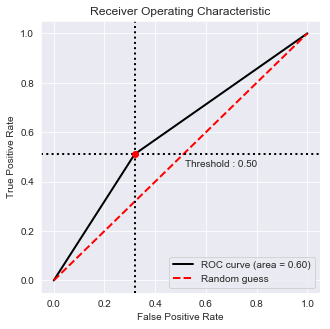

In [28]:
# Visualizando a curva ROC (Receiver Operating Characteristic)
%matplotlib inline
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(teste_classes, teste_probs, labels=["Classe 0", "Classe 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [29]:
# Importância das variáveis
importancia = pd.DataFrame({'Variável': variaveis,
                   'Importância': arvore.feature_importances_}).\
                    sort_values('Importância', ascending = False)
importancia.head()

,Variável,Importância
1,amount,0.231429
0,months_loan_duration,0.144095
4,age,0.125185
10,checking_balance_unknown,0.096905
3,years_at_residence,0.045298


## Random Forest

In [30]:
# Carregando o pacote do classificador Random Forest
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Criando o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, 
                               random_state=123, 
                               max_features = 'sqrt', 
                               n_jobs=1,
                               verbose = 1)

In [32]:
# Treinando o modelo
rf.fit(treino, treino_classes)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=123, verbose=1,
                       warm_start=False)

In [33]:
# Executando as previsões (probabilidade)
treino_probs_rf = rf.predict_proba(treino)[:, 1]
teste_probs_rf = rf.predict_proba(teste)[:, 1]

# Executando as previsões
previsoes_treino_rf = rf.predict(treino)
previsoes_teste_rf = rf.predict(teste)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [34]:
# AUC -Area Under the Receiver Operating Characteristic Curve (ROC AUC)
print(roc_auc_score(treino_classes, treino_probs_rf))
print(roc_auc_score(teste_classes, teste_probs_rf))

1.0
0.7854761904761905


In [35]:
# Matriz de confusão
confusion_matrix(previsoes_teste_rf, teste_classes)

array([[186,  50],
       [ 24,  40]], dtype=int64)

In [36]:
# Precisão, Recall e F1-Score
print(classification_report(teste_classes, previsoes_teste_rf, labels=nome_classes))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       210
           1       0.62      0.44      0.52        90

    accuracy                           0.75       300
   macro avg       0.71      0.67      0.68       300
weighted avg       0.74      0.75      0.74       300



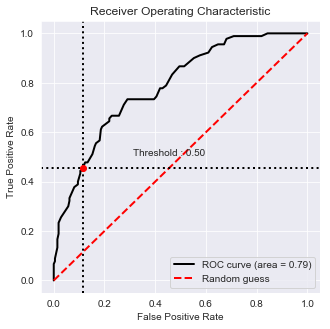

In [37]:
# Visualizando a curva ROC (Receiver Operating Characteristic
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(teste_classes, teste_probs_rf, labels=[1,0])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [38]:
# Importância das variáveis 
importancia = pd.DataFrame({'Variável': variaveis,
                   'Importância': rf.feature_importances_}).\
                    sort_values('Importância', ascending = False)
importancia.head()

,Variável,Importância
1,amount,0.125420
0,months_loan_duration,0.101904
4,age,0.094755
10,checking_balance_unknown,0.051429
2,percent_of_income,0.045644


In [ ]:
# Salvar o modelo 
import pickle

In [ ]:
# Salvando o modelo rf no disco
filename = 'randomForest_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
# Carregando o modelo
modelo_rf = pickle.load(open(filename, 'rb'))
resultado = modelo_rf.predict(teste)

In [ ]:
print(resultado)